<center><h1>Lab 18:<br>Ground State Configurations of Charged Balls</h1></center>
<h2>Introduction</h2>
In this lab we will study the lowest energy configuration, also called the "ground state", of a group of charged balls. We will do this by annealing a group of small charged balls into their ground state. By annealing, we mean "heating and then cooling the system". As we will see this removes defects in the structure of a crystal and is commonly done with real materials. We will use a motor to vibrate our system and this will give us our "temperature". Increasing the amplitude of the vibration will correspond to raising the "temperature" and decreasing the amplitude of the vibration will correspond to lowering the "temperature."<br><br>
We will charge the balls by putting them between two plates of conducting glass and then putting  3 kV between the plates. The glass conducts because it has been coated with ITO (Iridium Tin Oxide). Only the coated side is conducting. This experiment was first done by G. E. Blonder [1] at AT&T Bell Labs.<br><br>
We need to anneal the system to make sure that we find the ground state and not a metastable state. A system is in a metastable state when it is in a local minimum of energy, but not a global minimum which would be the ground state. This difference is shown in the two figures below. The first figure shows a ball in a metastable state.


In [1]:
#figure

The second figure shows a ball in the ground state

In [2]:
#figure

By shaking or heating the system we give the particle enough kinetic energy to escape from the local minimum and fall into the global minimum. Metastable states are never completely stable, but they can have very long life times. How one finds the ground state computationally is beyond the scope of this course. However if you are interested you can find discussions of this problem in papers by Berezin [2] and Wille and Vennik [3].<br><br>
The balls which are charged are free to move within a retaining ring. Since the charges on each ball all have the same sign, they will repel each other. They will, as all physical systems do, seek to minimize their energy.  Shown below are the minimum energy configurations for 21 balls with circular and square retaining rings.

In [3]:
#figure

<h2>Computing the Potential Energy</h2>

The potential energy of a collection of point charges is equal to the work required to drag them, one by one, from "very far away"; for n point charges, this is 
<br><br>
$U = \frac{1}{4 \pi \epsilon_0} \displaystyle\sum_{i<j}^{n} \left( \frac{q_i q_j}{r_{ij}} \right)$
<br><br>
Where $r_{ij}$ is the distance from charge $i$ to charge $j$.<br><br>
If our charges all have the same charge, then the potential energy is (up to a constant which we will not care about)
<br><br>
$U = q^2 \displaystyle\sum_{i<j}^n \frac{1}{r_{ij}}$<br><br>
For reasons that we will discuss in a moment we will want to be able to change the interaction from a $1/r^2$ force (and $1/r$ potential) between two point charges to a $1/r^4$ (or $1/r^3$ potential) force between two dipoles (see "The Dipole Approximation" section in the Week 16 lab writeup if you need some review)/ <br><br>
In either case we will compute the potential energy in two steps. First we compute the distance between any two points in the plane, and then we simply implement the formula for the potential energy. The function PotentialEnergy take two arguments. The first argument is a list of the positions of the charges. This list must be of the form {{x1,y1},{x2,y2},...,{xn,yn}}. The second argument is the power of the potential interaction. It will be one if we have point charges and three if we have dipoles.

In [53]:
def Distance(r1, r2):
    return ((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2)**0.5

def PotentialEnergy(charges, n):
    total_energy = 0

    for i in range(len(charges)):
        for j in range(i):
            distance = Distance(charges[i], charges[j])
            energy_contribution = 1 / (distance ** n)
            total_energy += energy_contribution

    return total_energy

Suppose we want to arrange eight balls in a circular retaining ring so that they have the minimum energy possible. We could put all eight balls so that they are equally spaced around the edge of the ring. I will call this case one.

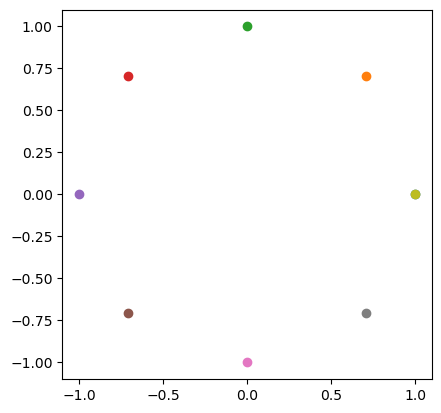

In [54]:
import numpy as np
from matplotlib import pyplot as plt

θ = np.linspace(0,np.pi*2,9)
CaseOne = [(np.cos(i), np.sin(i)) for i in θ]

for i in CaseOne:
    plt.plot(i[0], i[1], marker='o')
    
plt.gca().set_aspect('equal')
plt.show()

In [55]:
PotentialEnergy(CaseOne, 1)

4082809838298870.5

A second possibility is to put seven balls around the edge and one in the middle of the ring. I will call this "CaseTwo". The first step is to generate the ring.

In [62]:
CaseTwo = CaseOne + [(0,0)]

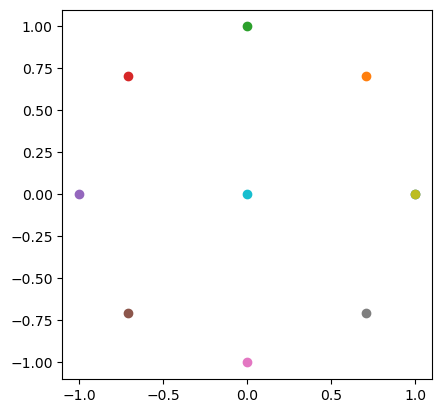

In [63]:
for i in CaseTwo:
    plt.plot(i[0], i[1], marker='o')
    
plt.gca().set_aspect('equal')
plt.show()

In [64]:
print(PotentialEnergy(CaseOne,1))
print(PotentialEnergy(CaseTwo,1))

4082809838298870.5
4082809838298879.5


The potential energy of this arrangement is slightly higher than that of "CaseOne". Does this prove that "CaseOne" is the ground state? No! It only proves that "CaseTwo" is not.

<h2>What is the Force between the Balls?</h2>
That is a good question. The force between the balls could be the force between two point charges or it could be the force between two dipoles, or even two quadrupoles. The problem is that charges can be induced on different parts of the plate, and these can result in partial cancellation of the charge on the balls and thus in quadrupole or dipole forces. Which case we end up with depends on the voltage, the size of the ring, and the number of the balls. If we have dipoles the potential is $1/r^3$ and the potential energies for the two charge configurations would be

In [65]:
print(PotentialEnergy(CaseOne,3))
print(PotentialEnergy(CaseTwo,3))

6.805772973609885e+46
6.805772973609885e+46


Look at that! If we have dipoles the second configuration is now lower in energy then the first.  Thus, it is important to take dipole effects into account.

<h2>Experimental Set Up</h2>
The experimental setup is shown in the figures below. The first figure shows a side view of the apparatus. The bottom glass plate is placed conducting side up. The top glass plate is placed with its conduction side down. We will use an Ohm-meter to check to see which is the conducting side of the glass. The foam is attached to the bottom delrin plate with double stick tape. The motor is attached to the wedge (not shown) with double stick tape, and the wedge is attached to the Al base with double stick tape. The Al base has two leveling screws (not shown). It is very important the retaining ring be level so that there is no component of the gravitational force in the plane of the bottom glass plate. The balls which are 1 mm stainless steel balls (non-magnetic) are put into the retaining ring. High voltage is applied to the copper tabs. This charges the balls and the wall of the retaining ring.

<h2 style="color: red;">Warning: We will be putting 3000 volts across the plates. Touching the plates or the leads will result in a severe shock and may well kill you! Be very careful. <u>Do not touch the apparatus</u> unless you are sure that the power supply is unplugged and that it is safe to do so. Never wear jewelry around high voltage.</h2>


In [67]:
#pictures

Sideview of the  apparatus. The plastic safety shield has been removed for clarity.<br><br>
Shown below is a top view of the apparatus  (shown here with eight balls).

In [68]:
#pictures

Photograph of the top of the apparatus with the square template. The plastic safety shield has been removed for clarity.<br><br>We have a number of different shapes and sizes for use as retaining rings. The different shapes are shown below. We will start with the small circular ring.

In [69]:
#pictures

<h2>Taking and Analyzing the Data</h2>
<p style="color: red;">Make sure the high voltage is unplugged!</p>
Put eight to sixteen balls into the smallest circular ring. The balls are hard to handle - use the tweezers to handle them. Try not to touch the balls; you do not want to get oil from your hands on the balls. Assemble the cell and make sure it is level.  You can adjust the amplitude (temperature) by changing the voltage on the power supply. Cover the apparatus with the plastic box. We will take data with a video camera. The camera has a macro lens on it and can easily resolve the balls. Use the monitor to make sure that the camera is focused.  Now slowly turn the high voltage on.  Let the system vibrate at a fairly high "temperature" for about a minute and then slowly turn the "temperature" down until the system freezes. When the system has frozen out, use the video software to take a snapshot of the balls. Reheat the balls and repeat the experiment. Do this a total of three times. Try some other templates. <br><br>
When you are finished, import the pictures into ImageJ.<br><br>
Once the frames are imported, read the coordinates of the balls off the picture. Then compute the potential energy of the charge configuration that you measured. Do this for both a $1/r^2$ and a $1/r^4$ force (that is a $1/r$ or $1/r^3$ potential). 

<h2>Upshot</h2>
This is a rough outline of the experiment. <i>This is not necessarily a complete list of what needs to be done.</i>
<h2 style="color: red;">Again, BE VERY CAREFUL.  The high voltage used in this experiment is EXTREMELY DANGEROUS.  Always ask questions if you are not sure what precautions you need to take when adjusting the apparatus.</h2>
1) Set up the apparatus using the circular retaining ring and some number (betwen 8 and 16) of balls.  "Heat" the system (i.e. increase the voltage so that it vibrates and the balls move around) for about a minute, then slowly "cool" it (i.e. decrease the voltage) until the system "freezes" (i.e. stops moving around).  Take a snapshot of the position of the balls.<br><br>
2) Repeat the "heating" and "cooling" phases for the same ring (two more times) to make sure the result is reproducible.  Take snapshots each time.<br><br>
3) Use a different retaining ring (and maybe a different number of balls) and repeat the procedure.  You will need results for at least three different retaining rings.<br><br>
4) Compute the potential energy of each configuration you found in both the monopole and dipole approximations.  Compare the value to the energy of some other plausible configurations of (the same number of) balls.  Do you think you found the ground state?  What do you think is the "force law" between the balls (e.g. $1/r^2$, $1/r^4$, etc.)?<br><br>
5) Think for a minute about symmetry.  Did the configurations you found possess any particular symmetry?  Was it the most symmetric configuration you could make with these balls?

<h2>Assignment</h2>

The assignment for Week 18 is a <u>full Lab Report</u> which addresses all relevant questions and results from this writeup, and reflects on each.  This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.

<h2>References</h2>
[1]	G. E. Blonder, <i>Bull. Am. Phys.</i> 30 403 (1985)<br>
[2]	A. A. Berezin, <i>Nature</i> 315 104 (1985)<br>
[3]	L. T. Wille and J. Vennik, <i>J.Phys. A: Math. Gen.</i> 18 L113 (1985).